In [1]:
import numpy as np
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import math 
style.use('ggplot')

In [2]:
def hypothesis(x,w,j):
    h = w[0]
    X=np.ones((len(w), len(x)))
    for i in np.arange(1, len(w)):                
        X[i] = x ** (i)
    X=np.transpose(X)
    h= X@w
    return h

In [3]:
#errors
def error(X, y, w, i, j):
    if(i==0): #mean_square_error
        y1 = hypothesis(X,w,j)
        return sum((y1-y)**2)/(y.size)
    elif i==1: #mean_absolute_error
        y1 = hypothesis(X,w,j)
        return sum(abs(y1-y))/(y.size)
    elif i==2: #log_cosh_loss
        y1 = hypothesis(X,w,j)
        std = math.sqrt(noise(X,w,y))
        return np.sum(np.log(np.cosh((y1-y)/std)))/(y.size)
    elif i==3: #root_mean_square_error
        y1 = hypothesis(X,w,j)
        return np.sqrt(sum((y1-y)**2)/(y.size))
    elif i==4: #log loss
        y1 = hypothesis(X,w,j)
        print(std)
        return -sum(np.log(np.abs(y1-y))/(y.size))
    elif i==5: #KLDivergence
        y1 = hypothesis(X,w,j)
        return np.sum(y1 *( np.log(abs(y1))-np.log(abs(y))))/y.size

In [4]:
#gradient functions
def grad(X, y, h, err,n=0):
    n=y.size
    if err==0:
        return (2/n)*np.dot(np.transpose(X), h-y)
    elif err==1:
        return (1/n)*np.dot(np.transpose(X),np.sign(h-y))    
    elif err==2:
        return (1/n)*np.dot(np.transpose(X), np.tanh((h-y)/n))
    elif err==3:
        return np.dot(np.transpose(X), h-y)/(np.sqrt(sum((h-y)**2))*n)
    elif err==4:
        return (-1/n)*np.dot((np.transpose(X),np.transpose(np.linalg.pinv(h-y))))
    elif err==5:
        return np.add(np.dot(np.transpose(X),np.log(np.abs(h/y))) , np.dot(np.transpose(X),y))

In [5]:
#basis functions
def basis(x,i):
    if(i==0):
        return x
    elif(i==1):
        #gaussian
        return np.exp(-(x**2)/2)
    elif(i==2):
        #sigmoid
        return 1/(1+np.exp(-x))
    elif(i==3):
        #tanh
        return (1-np.exp(-x))/(1+np.exp(-x))

In [6]:
#noise variance
def noise(x,w,y):
    return error(x, y, w, 0, 0)

In [7]:
def grd_des(x, y, order=1, err=0, basis=0, tol = 10**-5, numIters = 1000, learningRate = 10**-8):
    n = len(x)
    w = np.random.normal(0,0.1,(order + 1))          
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    Cost = []
    for i in range(numIters):
            h = hypothesis(x, w, 0)
            std = math.sqrt(noise(x,w,y))
            w += -learningRate * grad(X, y, h, err,std)
            cost = error(x, y, w, err , 0)
            Cost.append(cost)         
        
    
    plt.figure(1)
    plt.scatter(x,y,c='b')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i) ) 
    label = ''.join(labelr)
    print(label)
    print('Using gradient descent')
    func= hypothesis(x,w,0)
    plt.plot(x, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    
    plt.figure(2)
    plt.plot(Cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations of Gradient Descent')
    
    plt.show()
    return w

In [8]:
def main_f(order,what,size, batch_size=5, numIters = 1000,tol = 10**-5, learningRate = 0.001, err = 0):
    if(err==0):
        print('mean_square_error')
    elif err==1:
        print('mean_absolute_error')
    elif err==2: 
        print('log_cosh_loss')
    elif err==3: 
        print('root_mean_square_error')
    elif err==4: 
        print('log loss')
    elif err==5: 
        print('KLDivergence')
        
    if(what==0):
        print('Calculating w by psuedo_inverse')
    elif what==1:
        print('Calculating w by gradient descent')
        
    print('Polynomial Order:' + str(order))
    
    data_set= pd.read_csv("https://web.iitd.ac.in/~seshan/a1/group09.txt", sep="\s+")
    global X
    global Y
    X = data_set.iloc[:size,0].values
    Y = data_set.iloc[:size,1].values
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in range(0,20):
        if i%5 == 0:
            X_test.append(data_set.iloc[i,0])
            Y_test.append(data_set.iloc[i,1])
        else:
            X_train.append(data_set.iloc[i,0])
            Y_train.append(data_set.iloc[i,1])  
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    if what == 0:
        return perf_on_test(X_train, Y_train, X_test, Y_test,order)     
    else:
        w = grd_des(X_train, Y_train, order, err, 0, tol, numIters, learningRate)
        cost_train= error(X_train, Y_train, w,err,0)
        print('Training Cost: ' + str(cost_train))
        cost_test= error(X_test, Y_test, w, err,0)
        print('Testing Cost: ' + str(cost_test))
        noisee = noise(X,w,Y)
        print('Noise: ' + str(noisee))

log_cosh_loss
Calculating w by gradient descent
Polynomial Order:3
0.19 + 0.05x^1 + 0.12x^2 + 0.02x^3
Using gradient descent


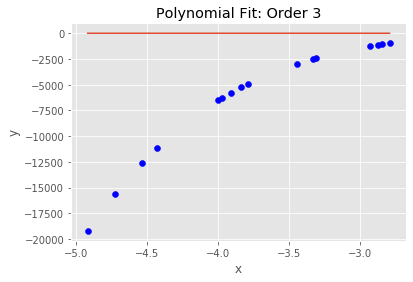

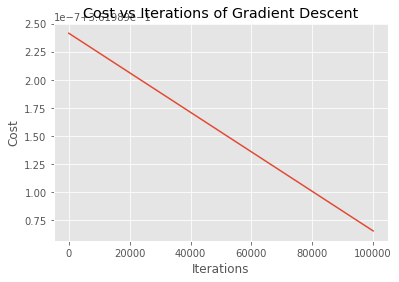

Training Cost: 0.3619890653527492
Testing Cost: 0.37333357339932866
Noise: 81197912.68719187
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:4
0.02 + 0.01x^1 + 0.07x^2 + -0.12x^3 + -0.06x^4
Using gradient descent


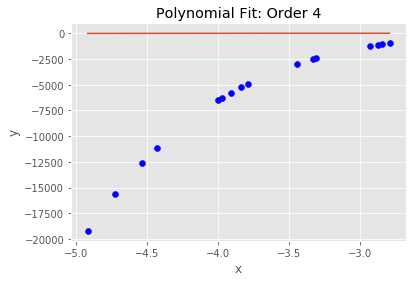

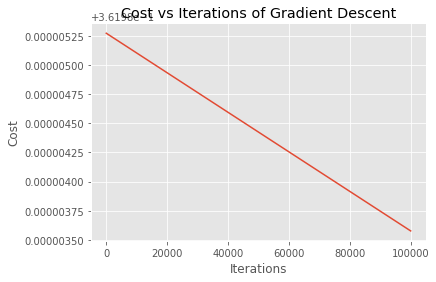

Training Cost: 0.3619835769297313
Testing Cost: 0.3733288114723101
Noise: 81027656.58653824
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:5
-0.14 + -0.04x^1 + 0.02x^2 + 0.07x^3 + -0.14x^4 + 0.15x^5
Using gradient descent


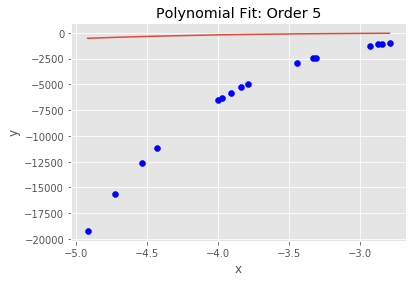

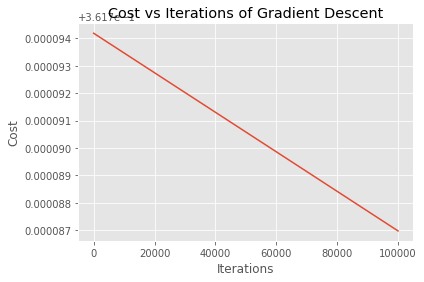

Training Cost: 0.3617869811287958
Testing Cost: 0.37318450336429726
Noise: 76680174.3166587
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:6
-0.07 + -0.11x^1 + -0.08x^2 + -0.02x^3 + 0.02x^4 + 0.07x^5 + -0.03x^6
Using gradient descent


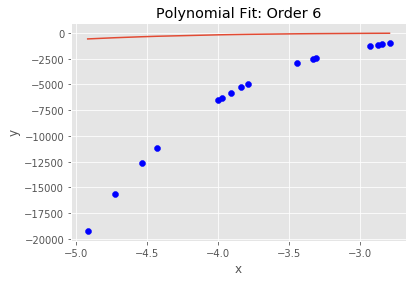

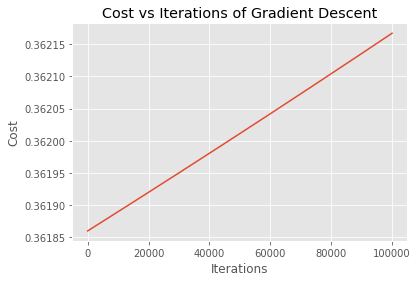

Training Cost: 0.3621668219024876
Testing Cost: 0.3734825233462331
Noise: 76524866.96713583
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:7
0.17 + 0.06x^1 + 0.12x^2 + 0.02x^3 + 0.17x^4 + -0.07x^5 + 0.05x^6 + 0.14x^7
Using gradient descent


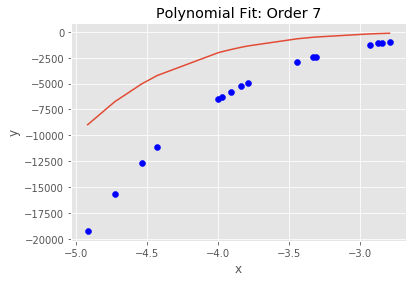

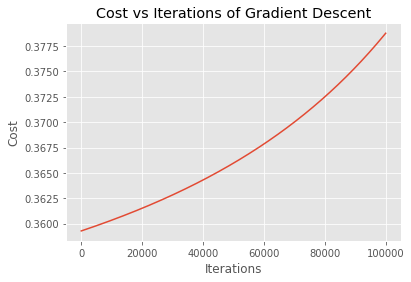

Training Cost: 0.37875485597525504
Testing Cost: 0.3889103363835494
Noise: 27598831.805879258
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:8
-0.21 + -0.17x^1 + -0.14x^2 + 0.08x^3 + -0.15x^4 + -0.27x^5 + -0.01x^6 + 0.06x^7 + -0.06x^8
Using gradient descent


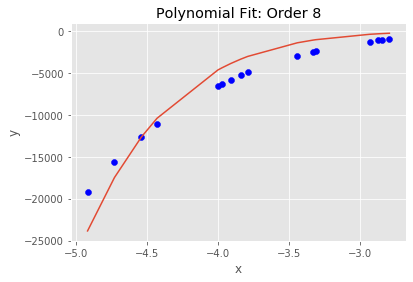

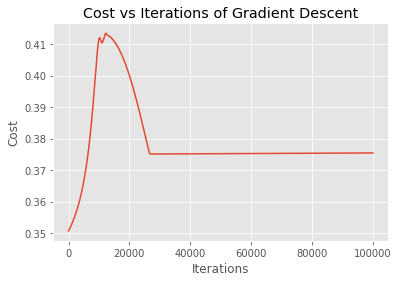

Training Cost: 0.37545008037664535
Testing Cost: 0.36925827211653534
Noise: 4734246.033209085
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:9
-0.01 + -0.01x^1 + 0.12x^2 + -0.04x^3 + 0.06x^4 + 0.25x^5 + -0.21x^6 + -0.03x^7 + 0.08x^8 + 0.03x^9
Using gradient descent


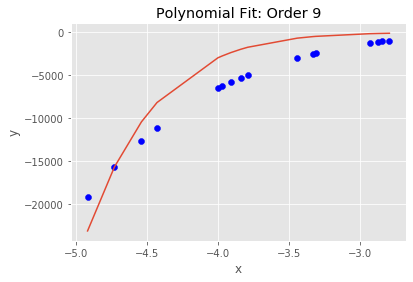

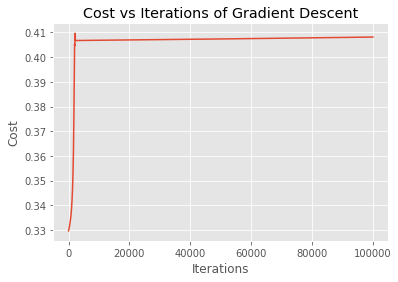

Training Cost: 0.40810130836408537
Testing Cost: 0.40763503585467886
Noise: 8230758.912793914


In [14]:
for i in range(3,10):
    main_f(i,1,20, 5, 100000,10**-5, 0.0000000001,2)

log_cosh_loss
Calculating w by gradient descent
Polynomial Order:3
0.05 + 0.08x^1 + -0.03x^2 + 0.03x^3
Using gradient descent


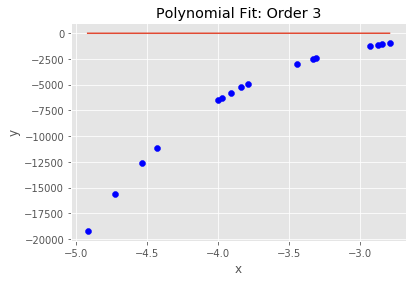

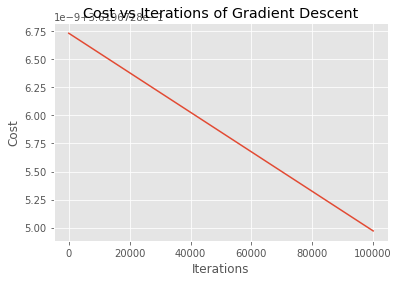

Training Cost: 0.36196728497092984
Testing Cost: 0.3733186486715763
Noise: 81136833.36842306
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:4
-0.05 + 0.19x^1 + -0.02x^2 + -0.10x^3 + -0.10x^4
Using gradient descent


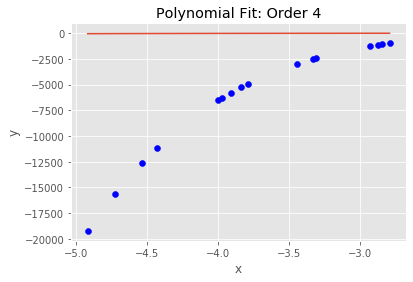

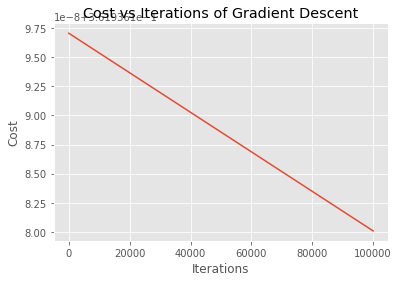

Training Cost: 0.3619361800694428
Testing Cost: 0.37329482809266684
Noise: 80753875.02954397
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:5
0.02 + -0.05x^1 + -0.11x^2 + 0.03x^3 + -0.02x^4 + -0.24x^5
Using gradient descent


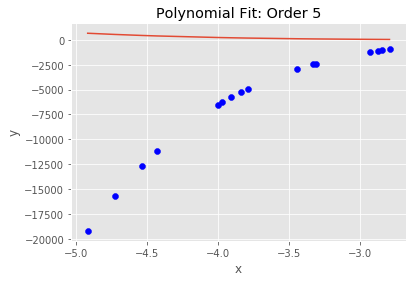

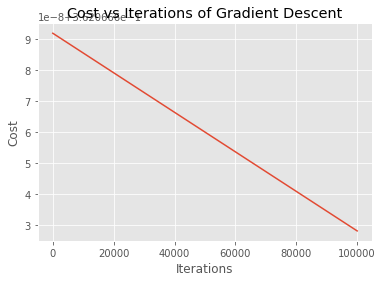

Training Cost: 0.36206662824400926
Testing Cost: 0.3733927170609053
Noise: 86932288.38380179
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:6
0.04 + 0.16x^1 + -0.11x^2 + 0.14x^3 + 0.08x^4 + 0.01x^5 + 0.03x^6
Using gradient descent


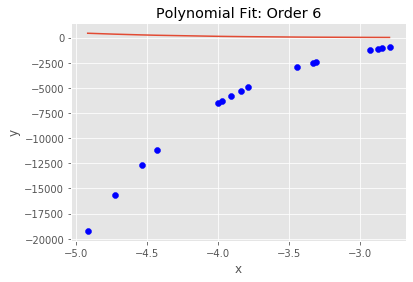

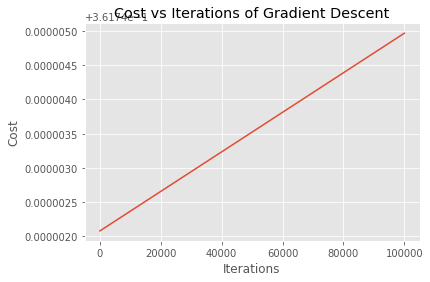

Training Cost: 0.36174496478132745
Testing Cost: 0.3731377872682243
Noise: 84685457.36116326
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:7
-0.02 + -0.11x^1 + 0.04x^2 + 0.08x^3 + -0.22x^4 + -0.04x^5 + 0.10x^6 + -0.02x^7
Using gradient descent


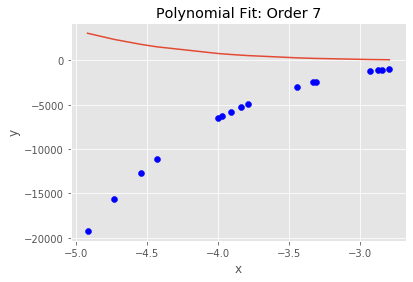

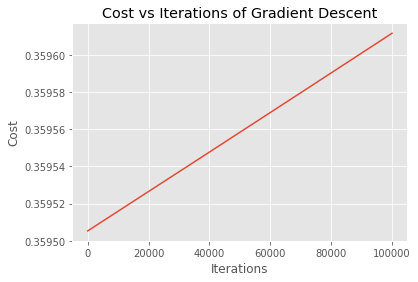

Training Cost: 0.3596116324875522
Testing Cost: 0.37138691671875484
Noise: 106889539.52773766
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:8
-0.05 + -0.09x^1 + -0.14x^2 + 0.09x^3 + -0.02x^4 + 0.07x^5 + 0.20x^6 + -0.09x^7 + -0.03x^8
Using gradient descent


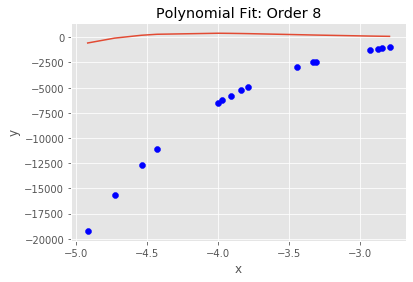

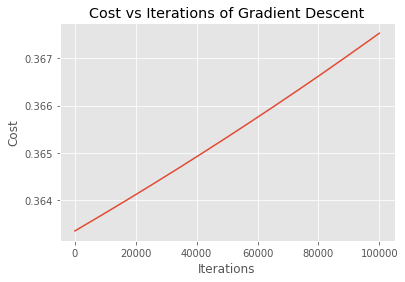

Training Cost: 0.36753158739846603
Testing Cost: 0.37860775006459857
Noise: 80937230.91114864
log_cosh_loss
Calculating w by gradient descent
Polynomial Order:9
-0.04 + -0.05x^1 + 0.09x^2 + 0.08x^3 + 0.06x^4 + 0.13x^5 + 0.07x^6 + 0.05x^7 + 0.20x^8 + 0.10x^9
Using gradient descent


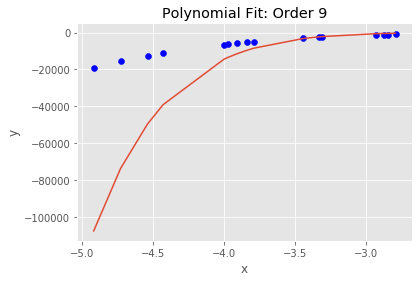

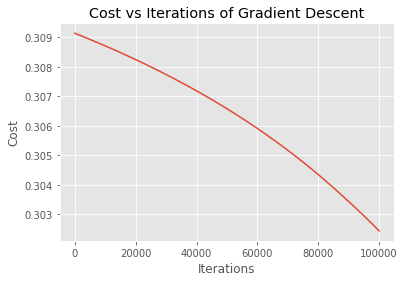

Training Cost: 0.30244341165642497
Testing Cost: 0.3374368816891273
Noise: 1216714953.856132


In [15]:
for i in range(3,10):
    main_f(i,1,20, 5, 100000,10**-5, 0.000000000001,2)